In [1]:
from connec_functions import execute_to_df, generate_sparql

import pandas as pd
import matplotlib.pyplot as plt

# Open Science Indicators

## Open Scientific Knowledge

### Open Access

#### 1. VLIZ publications in Open Acess

In [19]:
# starting out from the OMA & Bibio special collections 
# --> wil need to think about way to have special collection / database view that is automatically updated with new publications
OMA_pubs = execute_to_df('OMA_pubs.sparql')
OMA_pubs

,collection,title,publication,BibType,BibLvlCode,OA,publish_date,md_created,md_modified
0,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/publication/318057,Dissertation,,false,2019-01-01,2019-11-20,2019-11-20
1,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/publication/202228,NaN,,false,1902-01-01,2011-02-03,2011-02-03
2,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/publication/216478,Dissertation,,false,1976-01-01,2012-06-28,2017-02-15
3,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/publication/234191,Dissertation,,true,2007-01-01,2014-03-13,2014-03-13
4,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/publication/223092,NaN,,false,1959-01-01,2013-02-25,2020-06-08
...,...,...,...,...,...,...,...,...,...
8323,https://marineinfo.org/id/collection/396,VLIZ Bibliographies,https://marineinfo.org/id/publication/232359,NaN,,true,1993-01-01,2013-12-18,2017-07-04
8324,https://marineinfo.org/id/collection/396,VLIZ Bibliographies,https://marineinfo.org/id/publication/223940,NaN,,false,1991-01-01,2013-03-25,2018-11-23
8325,https://marineinfo.org/id/collection/396,VLIZ Bibliographies,https://marineinfo.org/id/publication/25879,NaN,,false,2002-01-01,2002-07-19,2018-07-19
8326,https://marineinfo.org/id/collection/396,VLIZ Bibliographies,https://marineinfo.org/id/publication/138124,Dissertation,,false,2009-01-01,2009-06-19,2014-02-12


In [20]:
# manipulate 'date' datatype
OMA_pubs['publish_date'] = pd.to_datetime(OMA_pubs['publish_date'])
OMA_pubs['md_created'] = pd.to_datetime(OMA_pubs['md_created'])
OMA_pubs['md_modified'] = pd.to_datetime(OMA_pubs['md_modified'])

OMA_pubs['publish_year'] = OMA_pubs['publish_date'].dt.year
OMA_pubs['md_created_year'] = OMA_pubs['md_created'].dt.year
OMA_pubs['md_modified_year'] = OMA_pubs['md_modified'].dt.year

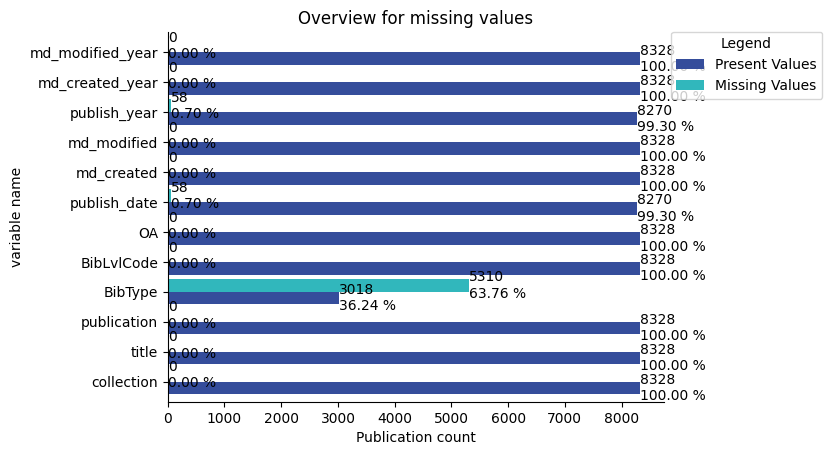

In [72]:
# Assessment of missing info
total_values = OMA_pubs.count()
missing_values = OMA_pubs.isnull().sum()

summary_OMA_pubs = pd.concat([total_values, missing_values], axis=1)
summary_OMA_pubs.columns = ['Present Values', 'Missing Values']
#summary_df['Total Values'] = summary_df['Present Values'] + summary_df['Missing Values'] 
#summary_df = summary_df.transpose()

#print(summary_OMA_pubs)

# bar plot of missing data 
ax = summary_OMA_pubs.plot(kind='barh', ylabel='variable name', title='Overview for missing values', width=0.85, color=['#354d9b', '#31b7bc'])
ax.set(xlabel='Publication count')

total = summary_OMA_pubs.sum(axis=1).iloc[0]
for c, col in zip(ax.containers, summary_OMA_pubs.columns):
    ax.bar_label(c, label_type='edge', labels=[f'{val}\n{val / total * 100.0:.2f} %' for val in summary_OMA_pubs[col]])

ax.legend(title='Legend', bbox_to_anchor=(1, 1.02), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.tight_layout()
plt.show()

Based on missing info, decided to use the year the publication' metadata was created in further analysis of Open Access

In [87]:
YEAR_INFO = "publish_year" # publish_year | md_created_year | md_modified_year
# Distribution of Open Access over the years
OMA_pubs_year = OMA_pubs.groupby([YEAR_INFO,'OA']).nunique()
#OMA_pubs_year['publication_cumsum'] = OMA_pubs_year['publication'].cumsum(skipna=False)

In [88]:
# Convert 'OA' column into separate columns
OMA_pubs_year_pivot = OMA_pubs_year.pivot_table(index=[YEAR_INFO], columns=['OA'], values='publication', aggfunc='sum', fill_value=0)

OMA_pubs_year_pivot = OMA_pubs_year_pivot.reset_index()                                # Reset index to flatten the DataFrame
OMA_pubs_year_pivot.columns = [YEAR_INFO, 'Non Open Access', 'Open Access']   # Rename columns

#print(OMA_pubs_year_pivot)

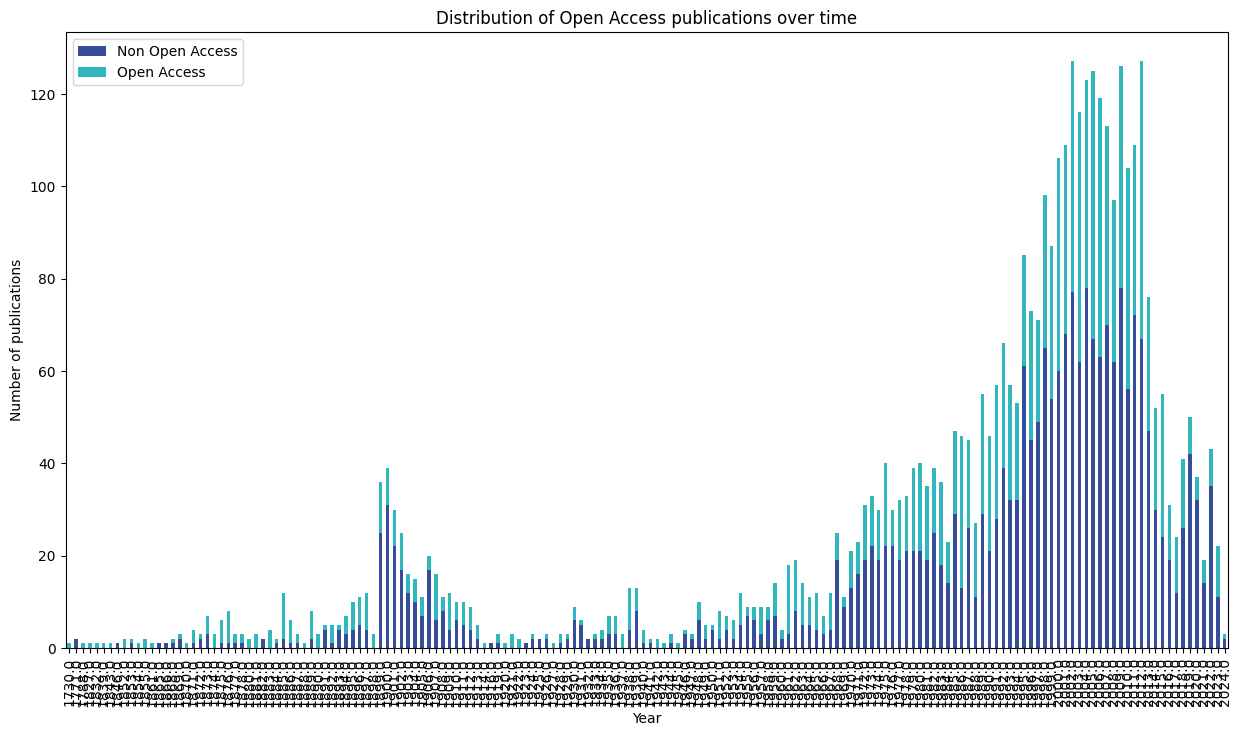

In [89]:
# Stacked barplot
OMA_pubs_year_pivot.set_index(YEAR_INFO)[['Non Open Access', 'Open Access']].plot(kind='bar', stacked=True, color=['#354d9b', '#31b7bc'], figsize=(15,8))

plt.xlabel('Year')
plt.ylabel('Number of publications')
plt.title('Distribution of Open Access publications over time')

plt.show()

### Open Data

#### 1. Datasets in Open Access

In [102]:
OMA_dats = execute_to_df('OMA_dats.sparql')

In [103]:
OMA_dats

,collection,collection_title,dataset
0,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/dataset/4503
1,https://marineinfo.org/id/collection/396,VLIZ Bibliographies,https://marineinfo.org/id/dataset/4503
2,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/dataset/4498
3,https://marineinfo.org/id/collection/396,VLIZ Bibliographies,https://marineinfo.org/id/dataset/4498
4,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/dataset/4519
...,...,...,...
195,https://marineinfo.org/id/collection/396,VLIZ Bibliographies,https://marineinfo.org/id/dataset/4501
196,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/dataset/5415
197,https://marineinfo.org/id/collection/396,VLIZ Bibliographies,https://marineinfo.org/id/dataset/5415
198,https://marineinfo.org/id/collection/396,vliz:biblio,https://marineinfo.org/id/dataset/4580


Using database export of VLIZCore pubs

In [2]:
file_path = 'data/datasetsPublicVlizcore_20240305.csv'
df = pd.read_csv(file_path, delimiter = ";")
df

,dasid,StandardTitle,Citation,AccessConstraint,AccConNotes
0,1,MWTL physical monitoring network: current wate...,NaN,Attribution (CC BY),Release with permission of the appropriate par...
1,2,Algaebase,"Guiry, M.D. & Guiry, G.M. 2012. AlgaeBase. Wor...","For more information on the restrictions, use ...",NaN
2,3,VLIZ's Marine Species Register,VLIZ (2004). Data from VLIZ's Marine Species R...,Attribution (CC BY),NaN
3,4,Arctic Benthic Fauna,NaN,NaN,NaN
4,5,Arctic hard-bottom fauna [Jan Mayen I.],NaN,NaN,NaN
...,...,...,...,...,...
5567,8544,Acoustic telemetry study of Allis shad (<i>Alo...,"Kroes, R.; Verhelst, P.; Van Rijssel, J.C.; Me...",Attribution (CC BY),NaN
5568,8551,Blue crab (<i>Callinectes sapidus</i>) telemet...,BIOTOPE (2024) : Csapidus_monitoring_Occitanie...,Attribution (CC BY),NaN
5569,8552,Acoustic telemetry study of European eel (<i>A...,"Winter, HV; Griffioen, AB; van Keeken, OA; van...",Attribution (CC BY),NaN
5570,8553,Acoustic telemetry study in the Meuse river ba...,"van Rijssel, JC.; Claus, MPA; van Emmerik, WAM...",Attribution (CC BY),NaN


In [149]:
# Dataframe of missing data
total_values = df.count()
missing_values = df.isnull().sum()

summary_df = pd.concat([total_values, missing_values], axis=1)
summary_df.columns = ['Present Values', 'Missing Values']
#summary_df['Total Values'] = summary_df['Present Values'] + summary_df['Missing Values'] 
#summary_df = summary_df.transpose()

summary_df

,Present Values,Missing Values
dasid,5572,0
StandardTitle,5571,1
Citation,4122,1450
AccessConstraint,5116,456
AccConNotes,828,4744


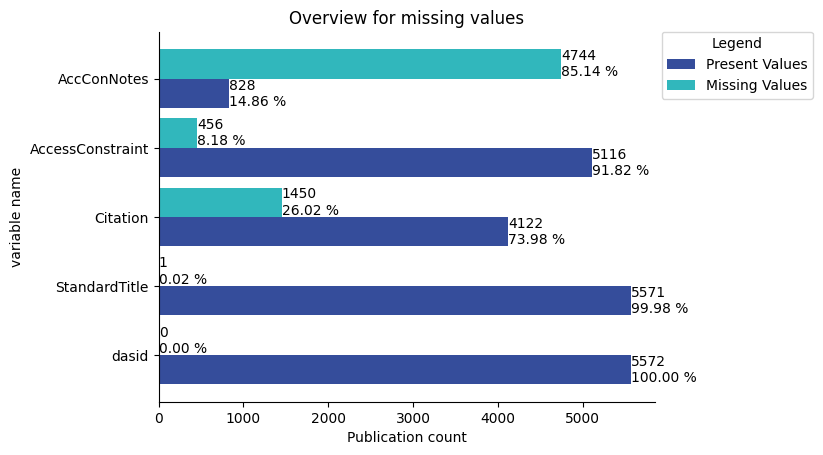

In [150]:
#test if barh is better
ax = summary_df.plot(kind='barh', ylabel='variable name', title='Overview for missing values', width=0.85, color=['#354d9b', '#31b7bc'])
ax.set(xlabel='Publication count')

total = summary_df.sum(axis=1).iloc[0]
for c, col in zip(ax.containers, summary_df.columns):
    ax.bar_label(c, label_type='edge', labels=[f'{val}\n{val / total * 100.0:.2f} %' for val in summary_df[col]])

ax.legend(title='Legend', bbox_to_anchor=(1, 1.02), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.tight_layout()
plt.show()

In [151]:
# Distribution of Access Constraints
grouped = df.groupby('AccessConstraint', dropna=True).nunique()

grouped_sub = grouped[['dasid']] #.reset_index()
grouped_sub = grouped_sub.rename(columns={'dasid':'publication'})

grouped_sub_sorted = grouped_sub.sort_values(by='publication')
grouped_sub_sorted

,publication
AccessConstraint,
Public Domain Mark (No Known Copyright),1
Attribution-NoDerivatives (CC BY-ND),5
Commercially available,15
Licence,17
Attribution-NonCommercial-NoDerivatives (CC BY-NC-ND),19
Unrestricted for academic use,20
Attribution-ShareAlike (CC BY-SA),23
"The data can be made available upon approval of the data provider, please contact data@vliz.be.",25
Attribution-NonCommercial-ShareAlike (CC BY-NC-SA),37


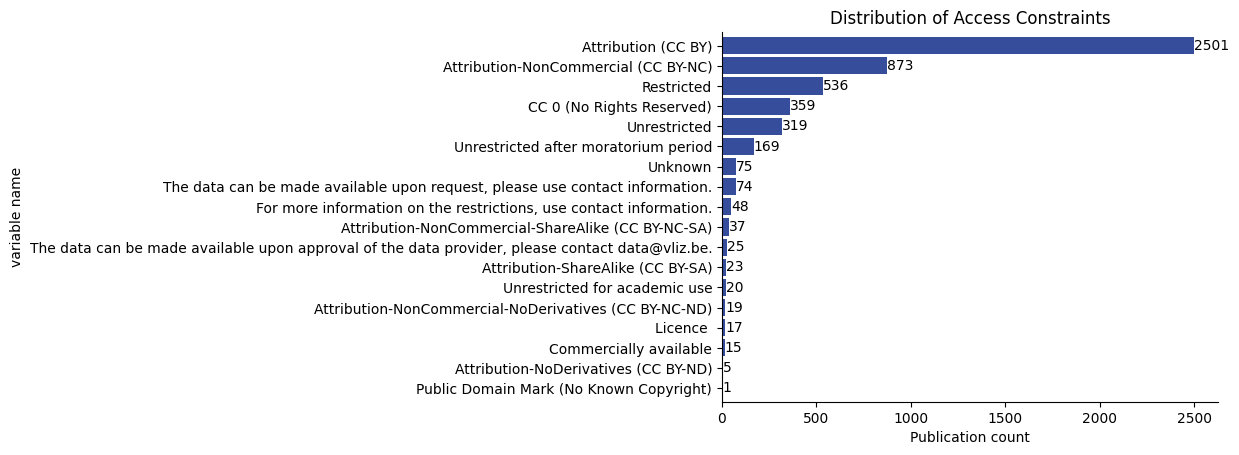

In [152]:
# Barplot of Distribution of Access Constraints
ax = grouped_sub_sorted.plot(kind='barh', ylabel='variable name', title='Distribution of Access Constraints', width=0.85, color=['#354d9b'], legend=False)
ax.set(xlabel='Publication count')

total = grouped_sub_sorted.sum(axis=1).iloc[0]
for c, ind in zip(ax.containers, grouped_sub_sorted.index):
    ax.bar_label(c, label_type='edge', labels=[f'{val}' for val in grouped_sub_sorted.loc[ind]])

#ax.legend(title='Legend', loc='lower right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.tight_layout()
plt.show()